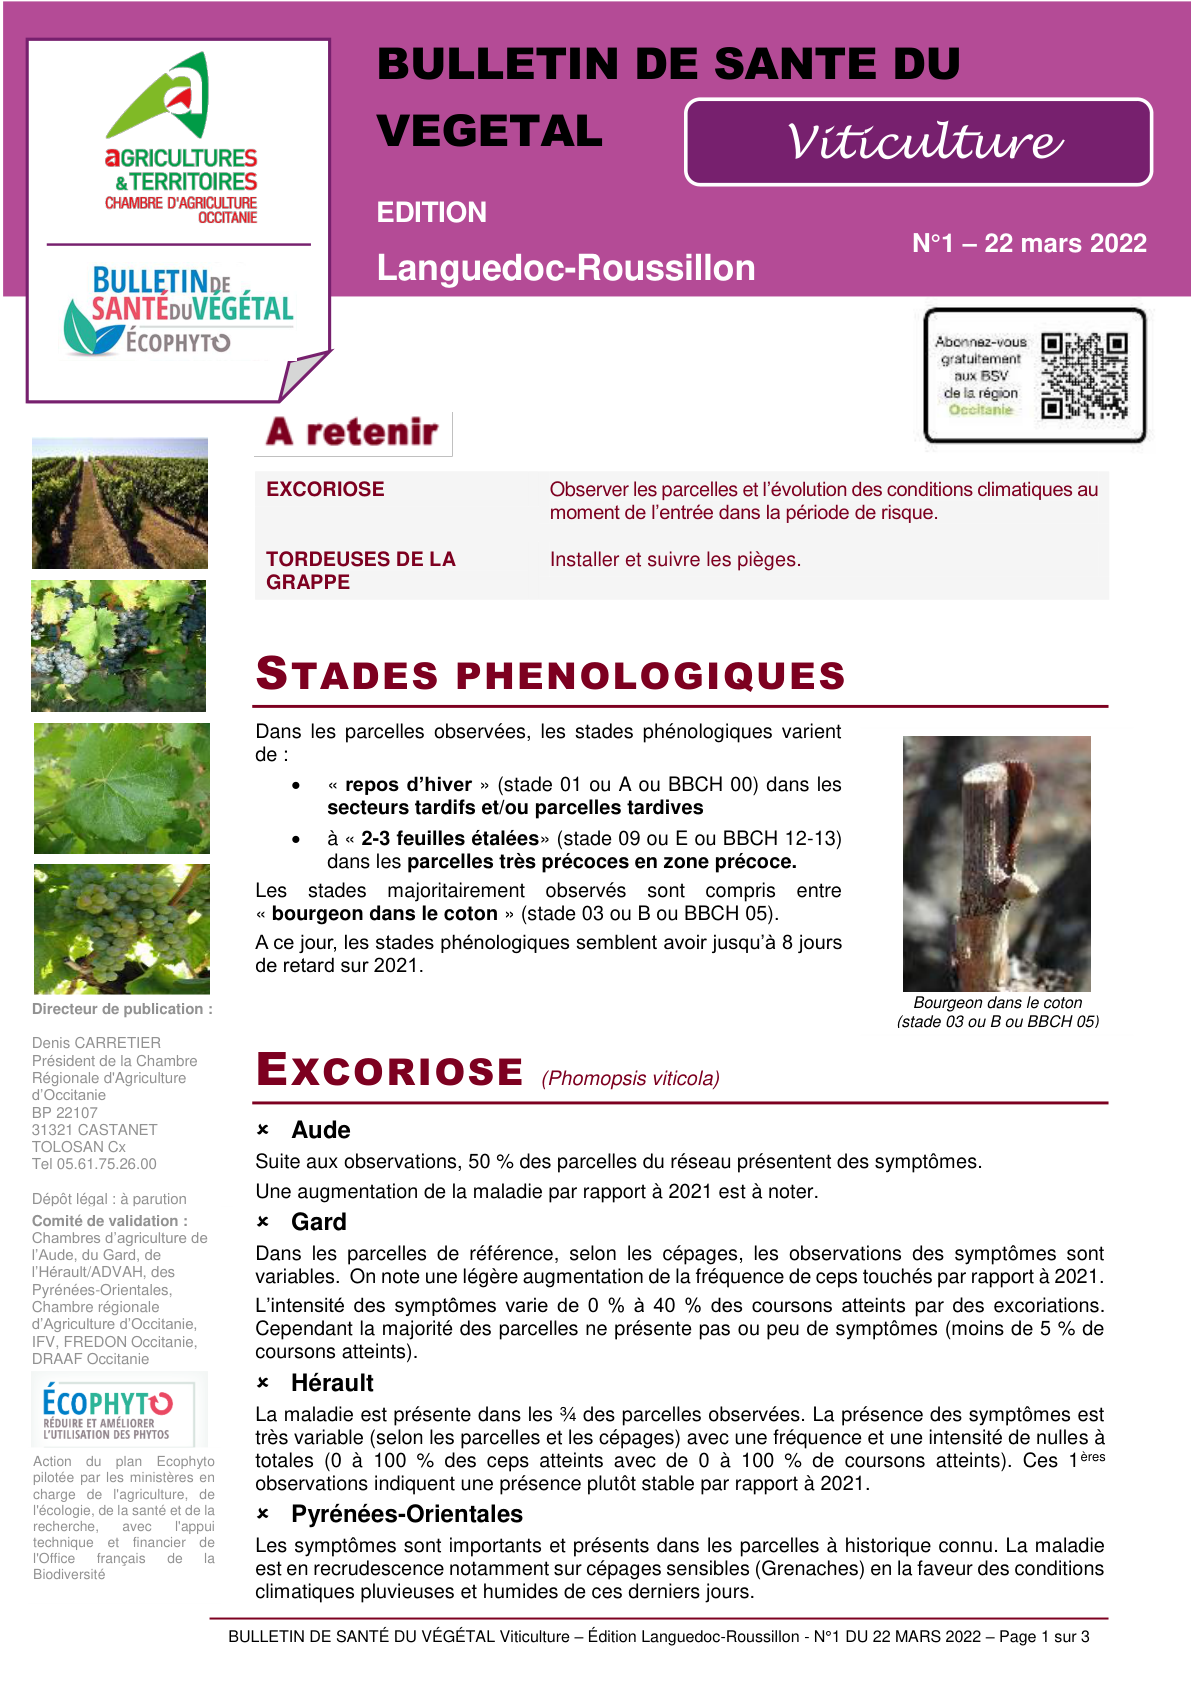

In [69]:
import fitz  # PyMuPDF
from PIL import Image
!mkdir -p out

# Définir le nom du fichier PDF et le numéro de la page à afficher
page_num = 0
max_display = 1

zoom_x = 2.0  # zoom horizontal
zoom_y = 2.0  # zoom vertical
mat = fitz.Matrix(zoom_x, zoom_y)  # matrice pour mettre à l'échelle la page

# Charger le PDF et convertir la page spécifiée en une image
doc = fitz.open(pdf_path)
for page in doc:
  page_num += 1
  if page_num <= max_display:
    pix = page.get_pixmap(matrix=mat)
    stream = pix.pil_tobytes(format="png", optimize=True)
    img = Image.open(io.BytesIO(stream))
    display(img)

## Structure du pdf


In [70]:
from pdfminer.high_level import extract_text, extract_pages
from IPython.display import display
from PIL import Image

In [71]:
print(doc.metadata)

{'format': 'PDF 1.5', 'title': '', 'author': 'Barbara Cichosz', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word\xa02013', 'producer': 'Microsoft® Word\xa02013', 'creationDate': "D:20220323115512+01'00'", 'modDate': "D:20220323115512+01'00'", 'trapped': '', 'encryption': None}


In [72]:
print(doc.get_toc())

[]


In [73]:
page = doc.load_page(0)
page.get_links()

[]

### XML

In [74]:
xml_string = page.get_text("xml")
#print(xml_string)

In [75]:
import xml.etree.ElementTree as ET
root = ET.fromstring(xml_string)
for child in root:
    print(child)
    print(child.tag, child.attrib)

<Element 'block' at 0x7f7700d37bd0>
block {'bbox': '127.58 27.600007 130.07587 38.640005'}
<Element 'block' at 0x7f7700d37630>
block {'bbox': '114.14 812.493 547.13516 823.5399'}
<Element 'block' at 0x7f77014860e0>
block {'bbox': '15.84 498.86079 108.44167 684.20046'}
<Element 'block' at 0x7f7700e427c0>
block {'bbox': '16.56 725.698 109.55256 767.41708'}
<Element 'block' at 0x7f7700f3b9a0>
block {'bbox': '16.56 765.894 109.524738 783.497'}
<Element 'block' at 0x7f7701256d10>
block {'bbox': '16.56 782.214 54.73488 791.77706'}
<Element 'block' at 0x7f770126c270>
block {'bbox': '188.06 15.551104 488.24217 46.518136'}
<Element 'block' at 0x7f770126c9f0>
block {'bbox': '188.06 49.031145 533.94937 86.87533'}
<Element 'block' at 0x7f7701285270>
block {'bbox': '188.06 95.99716 247.31313 115.33024'}
<Element 'block' at 0x7f7701285630>
block {'bbox': '188.06 120.68 383.074 145.466'}
<Element 'block' at 0x7f7701285e00>
block {'bbox': '127.58 66.57297 130.34888 196.31801'}
<Element 'block' at 0x7f

In [76]:
counter = 0
for single_page_layout in extract_pages(pdf_path):
    counter +=1
    print(f'Page {counter}')
    for elt in single_page_layout:
        print(elt)
    if counter == 1:
        break

Page 1
<LTTextBoxHorizontal(0) 188.060,797.544,488.231,819.504 'BULLETIN DE SANTE DU \n'>
<LTTextBoxHorizontal(1) 188.060,764.064,308.923,786.024 'VEGETAL \n'>
<LTTextBoxHorizontal(2) 188.060,727.994,247.313,742.034 'EDITION \n'>
<LTTextBoxHorizontal(3) 392.350,755.703,533.941,777.663 'Viticulture \n'>
<LTTextBoxHorizontal(4) 188.060,698.254,383.074,716.254 'Languedoc-Roussillon \n'>
<LTTextBoxHorizontal(5) 455.980,713.298,577.563,726.297 'N°1 – 22 mars 2022 \n'>
<LTTextBoxHorizontal(6) 132.980,592.038,198.059,601.998 'EXCORIOSE  \n'>
<LTTextBoxHorizontal(7) 274.850,580.368,552.074,601.878 'Observer les parcelles et l’évolution des conditions climatiques au \nmoment de l’entrée dans la période de risque. \n'>
<LTTextBoxHorizontal(8) 132.980,545.448,230.638,566.808 'TORDEUSES DE LA \nGRAPPE \n'>
<LTTextBoxHorizontal(9) 274.850,556.728,403.879,566.688 'Installer et suivre les pièges. \n'>
<LTTextBoxHorizontal(10) 127.580,492.706,431.822,515.746 'STADES PHENOLOGIQUES \n'>
<LTTextBoxHorizo

### PDF to dict

In [77]:
page = doc.load_page(1)
text_dict = page.get_text("dict", sort=True, flags=fitz.TEXTFLAGS_TEXT)

In [78]:
for text_block in text_dict["blocks"]:
  if text_block["type"] == 0:
    for line in text_block["lines"]:
      for spans in line["spans"]:
        counter += 1
        if counter > 2:
            break;
        display(spans)

{'size': 11.039999961853027,
 'flags': 0,
 'font': 'Calibri',
 'color': 0,
 'ascender': 0.75,
 'descender': -0.25,
 'text': ' ',
 'origin': (127.58000183105469, 35.8800048828125),
 'bbox': (127.58000183105469,
  27.600006103515625,
  130.07586669921875,
  38.6400032043457)}

In [131]:
pdf = fitz.open(pdf_path)
counter = 1
page_counter = 0
for i in range(len(pdf)):
    page_counter += 1
    page = pdf[i]
    images = page.get_images()
    for image in images:
        base_img = pdf.extract_image(image[0])
        image_data = base_img["image"]
        img = PIL.Image.open(io.BytesIO(image_data))
        extension = base_img["ext"]
        folder = f'extracted_images/page_{page_counter}'
        if not os.path.exists(folder):
            os.makedirs(folder)
        img.save(open(f'{folder}/image{counter}.{extension}', "wb"))
        counter += 1
    if counter ==1:
        break

In [131]:
pdf = fitz.open(pdf_path)
counter = 1
page_counter = 0
for i in range(len(pdf)):
    page_counter += 1
    page = pdf[i]
    images = page.get_images()
    for image in images:
        base_img = pdf.extract_image(image[0])
        image_data = base_img["image"]
        img = PIL.Image.open(io.BytesIO(image_data))
        extension = base_img["ext"]
        folder = f'extracted_images/page_{page_counter}'
        if not os.path.exists(folder):
            os.makedirs(folder)
        img.save(open(f'{folder}/image{counter}.{extension}', "wb"))
        counter += 1
    if counter ==1:
        break

## Conversion en format HTML pour observer la hierarchie

In [129]:
from io import StringIO
from pdfminer.high_level import extract_text_to_fp
from pdfminer.layout import LAParams
import codecs
import os
import IPython

# Create output folder if it doesn't exist
if not os.path.exists("XHTML"):
    os.mkdir("XHTML")

output_string = StringIO()
with open(pdf_path, 'rb') as fin:
    extract_text_to_fp(fin, output_string, laparams=LAParams(),
                       output_type='html', codec=None)

# Save output as .xhtml file in output folder
with codecs.open('XHTML/output.xhtml', 'w', encoding='utf-8') as f:
    f.write(output_string.getvalue().strip())

# Display xhtml content in notebook
with codecs.open('XHTML/output.xhtml', 'r', encoding='utf-8') as f:
    xhtml_content = f.read()

IPython.display.HTML(xhtml_content)


## Extraction des images

In [130]:
import fitz
import PIL.Image
import io
import os